## 1️⃣ Import Libraries

In [1]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk machine learning
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Setting visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Semua library berhasil diimport!")

✅ Semua library berhasil diimport!


## 2️⃣ Load Data Preprocessing

In [2]:
# Load 4 file hasil preprocessing dari Minggu 2
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv').squeeze()
y_test = pd.read_csv('data/y_test.csv').squeeze()

print("📊 Informasi Data:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape : {y_test.shape}")
print("\n✅ Data berhasil dimuat!")

📊 Informasi Data:
X_train shape: (640, 17)
X_test shape : (160, 17)
y_train shape: (640,)
y_test shape : (160,)

✅ Data berhasil dimuat!


## 3️⃣ Exploratory Data Analysis (EDA)

Sebelum modeling, mari kita pahami data lebih dalam.

### 📊 A. Distribusi Target Variable (Yield)

📊 Statistik Deskriptif Target Variable (Yield):

count    640.000000
mean       4.651121
std        1.719232
min       -0.007103
25%        3.353734
50%        4.751227
75%        5.898646
max        8.869623
Name: Yield_tons_per_hectare, dtype: float64


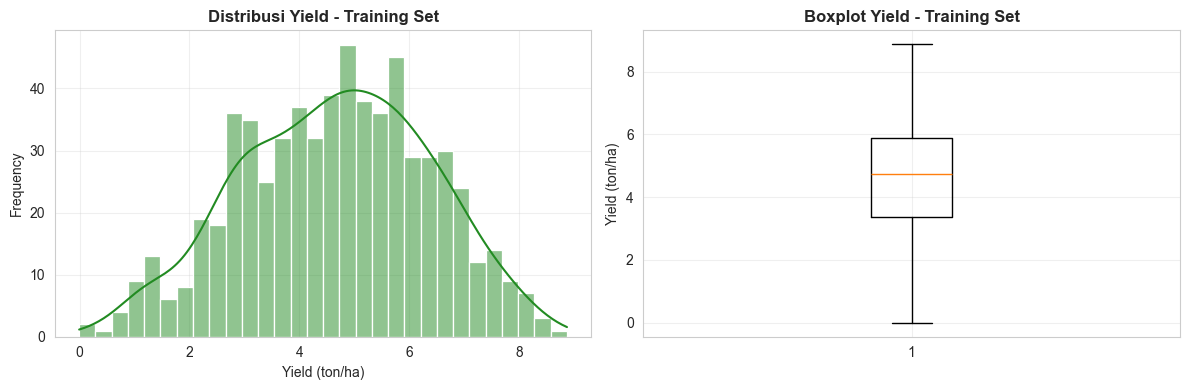


💡 Insight:
   - Range yield: -0.01 - 8.87 ton/ha
   - Rata-rata: 4.65 ton/ha
   - Median: 4.75 ton/ha


In [3]:
print("📊 Statistik Deskriptif Target Variable (Yield):\n")
print(y_train.describe())

# Visualisasi distribusi
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(y_train, kde=True, color='forestgreen', bins=30)
plt.title('Distribusi Yield - Training Set', fontsize=12, fontweight='bold')
plt.xlabel('Yield (ton/ha)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(y_train, vert=True)
plt.ylabel('Yield (ton/ha)')
plt.title('Boxplot Yield - Training Set', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 Insight:")
print(f"   - Range yield: {y_train.min():.2f} - {y_train.max():.2f} ton/ha")
print(f"   - Rata-rata: {y_train.mean():.2f} ton/ha")
print(f"   - Median: {y_train.median():.2f} ton/ha")

### 🔥 B. Korelasi Fitur Numerik dengan Target

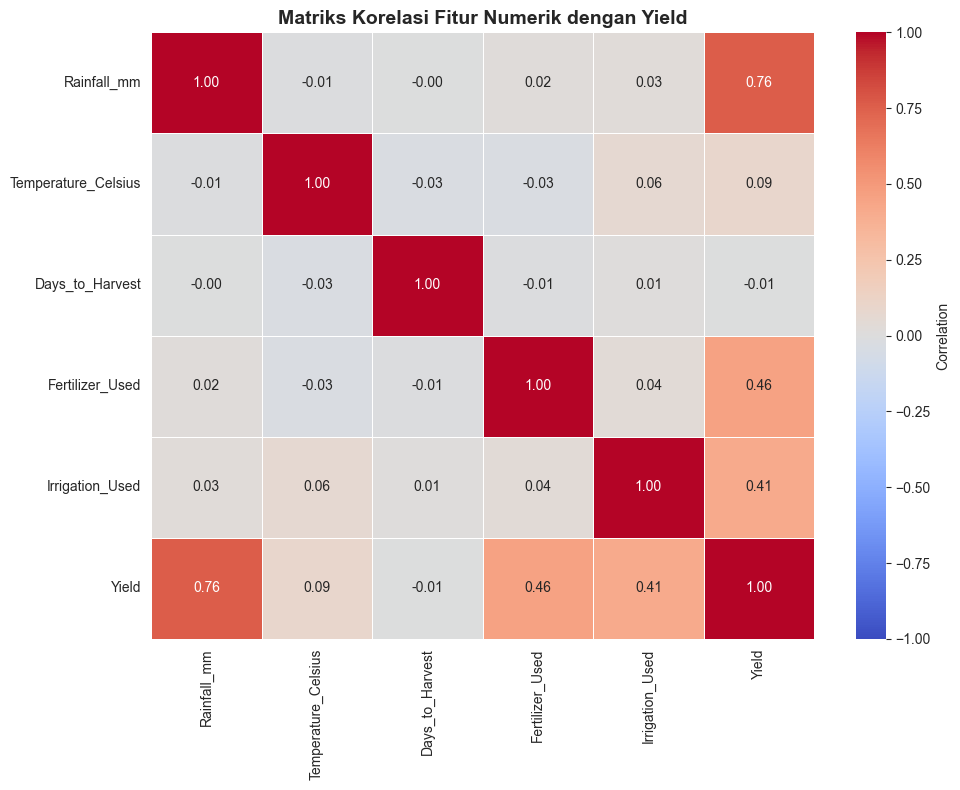


📈 Korelasi Fitur dengan Yield (diurutkan):

   Rainfall_mm              : +0.759
   Fertilizer_Used          : +0.455
   Irrigation_Used          : +0.412
   Temperature_Celsius      : +0.086
   Days_to_Harvest          : -0.007


In [4]:
# Gabungkan fitur numerik dengan target untuk analisis korelasi
numeric_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 
                'Fertilizer_Used', 'Irrigation_Used']

temp_df = X_train[numeric_cols].copy()
temp_df['Yield'] = y_train.values

# Hitung dan visualisasi korelasi
plt.figure(figsize=(10, 8))
correlation = temp_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", 
            linewidths=0.5, center=0, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Matriks Korelasi Fitur Numerik dengan Yield', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Tampilkan korelasi terurut
print("\n📈 Korelasi Fitur dengan Yield (diurutkan):\n")
correlations = correlation['Yield'].sort_values(ascending=False)
for col, val in correlations.items():
    if col != 'Yield':
        print(f"   {col:25s}: {val:+.3f}")

### 🌾 C. Analisis Berdasarkan Kategori (Crop, Soil, Weather)

Untuk analisis kategorikal, kita perlu load data asli karena X_train sudah di-encode.

C:\Users\Ikhlas Putra\AppData\Local\Temp\ipykernel_14084\1885554142.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop_yield.index, y=crop_yield.values, palette='viridis', ax=axes[0])
C:\Users\Ikhlas Putra\AppData\Local\Temp\ipykernel_14084\1885554142.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_original, x='Weather_Condition', y='Yield_tons_per_hectare',
C:\Users\Ikhlas Putra\AppData\Local\Temp\ipykernel_14084\1885554142.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train_original, x='Soil_Type'

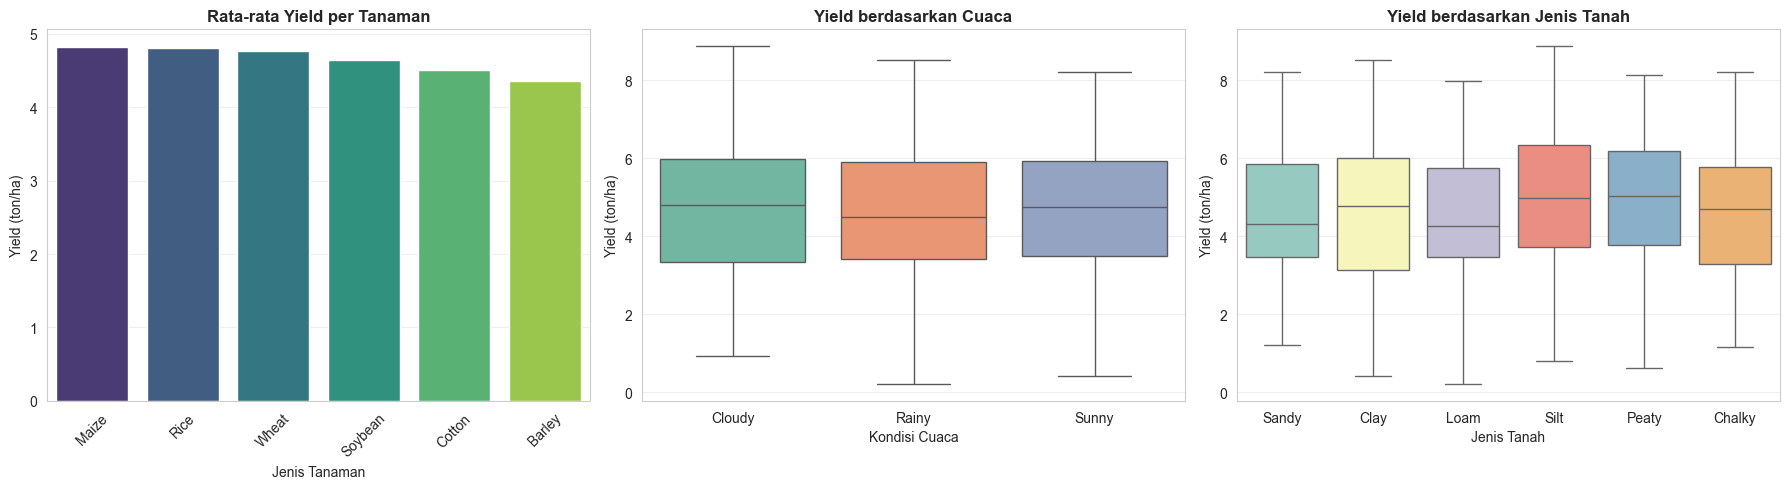

🌾 Top 3 Tanaman dengan Yield Tertinggi:
Crop
Maize    4.816779
Rice     4.809920
Wheat    4.763526
Name: Yield_tons_per_hectare, dtype: float64


In [5]:
# Load data asli untuk analisis kategori
df_original = pd.read_csv('data/dataset_800.csv', sep=';', decimal=',')
df_train_original = df_original.loc[X_train.index]

# Visualisasi berdasarkan Crop
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Yield per Crop
crop_yield = df_train_original.groupby('Crop')['Yield_tons_per_hectare'].mean().sort_values(ascending=False)
sns.barplot(x=crop_yield.index, y=crop_yield.values, palette='viridis', ax=axes[0])
axes[0].set_title('Rata-rata Yield per Tanaman', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Jenis Tanaman')
axes[0].set_ylabel('Yield (ton/ha)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Yield per Weather
sns.boxplot(data=df_train_original, x='Weather_Condition', y='Yield_tons_per_hectare', 
            palette='Set2', ax=axes[1])
axes[1].set_title('Yield berdasarkan Cuaca', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Kondisi Cuaca')
axes[1].set_ylabel('Yield (ton/ha)')
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Yield per Soil Type
sns.boxplot(data=df_train_original, x='Soil_Type', y='Yield_tons_per_hectare', 
            palette='Set3', ax=axes[2])
axes[2].set_title('Yield berdasarkan Jenis Tanah', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Jenis Tanah')
axes[2].set_ylabel('Yield (ton/ha)')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("🌾 Top 3 Tanaman dengan Yield Tertinggi:")
print(crop_yield.head(3))

### 💧 D. Pengaruh Pupuk & Irigasi

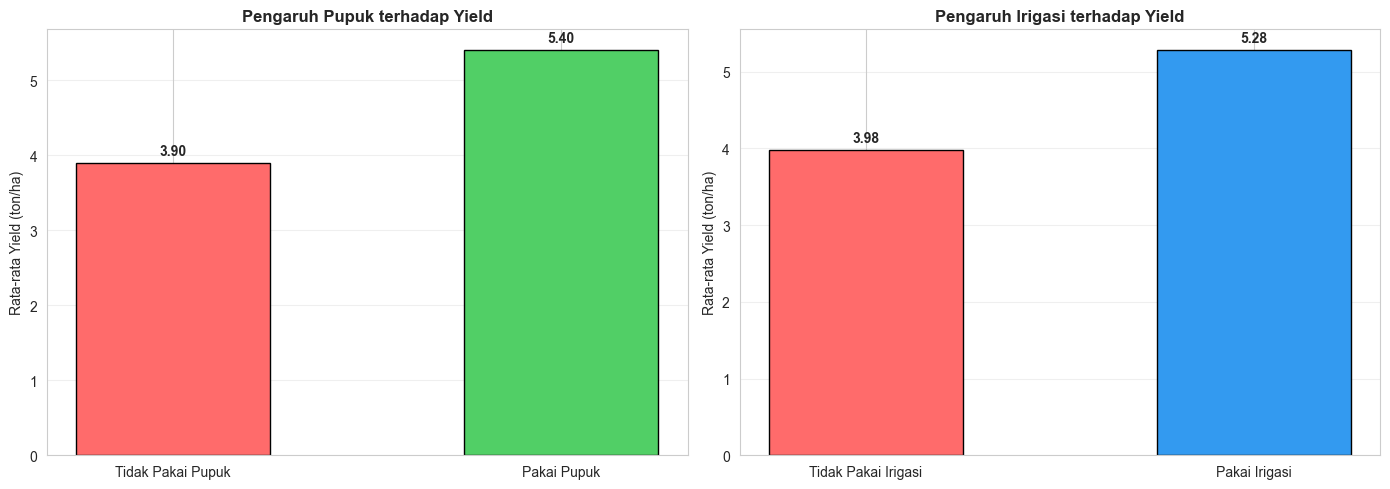


💧 Analisis Kombinasi Pupuk & Irigasi:
Fertilizer_Used  Irrigation_Used
False            False              3.163391
                 True               4.590169
True             False              4.789956
                 True               5.992423
Name: Yield_tons_per_hectare, dtype: float64


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafik 1: Fertilizer Effect
fertilizer_data = df_train_original.groupby('Fertilizer_Used')['Yield_tons_per_hectare'].mean()
colors_fert = ['#ff6b6b', '#51cf66']
bars1 = axes[0].bar(['Tidak Pakai Pupuk', 'Pakai Pupuk'], fertilizer_data.values, 
                     color=colors_fert, width=0.5, edgecolor='black')
axes[0].set_title('Pengaruh Pupuk terhadap Yield', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Rata-rata Yield (ton/ha)')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(fertilizer_data.values):
    axes[0].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

# Grafik 2: Irrigation Effect
irrigation_data = df_train_original.groupby('Irrigation_Used')['Yield_tons_per_hectare'].mean()
colors_irr = ['#ff6b6b', '#339af0']
bars2 = axes[1].bar(['Tidak Pakai Irigasi', 'Pakai Irigasi'], irrigation_data.values, 
                     color=colors_irr, width=0.5, edgecolor='black')
axes[1].set_title('Pengaruh Irigasi terhadap Yield', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Rata-rata Yield (ton/ha)')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(irrigation_data.values):
    axes[1].text(i, v + 0.1, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistik kombinasi
print("\n💧 Analisis Kombinasi Pupuk & Irigasi:")
combo = df_train_original.groupby(['Fertilizer_Used', 'Irrigation_Used'])['Yield_tons_per_hectare'].mean()
print(combo)

---

## 4️⃣ Baseline Model: Decision Tree Regressor

### 📖 Mengapa Decision Tree?
- **Mudah dipahami**: Interpretable seperti pohon keputusan manusia
- **Tidak perlu scaling**: Bisa langsung pakai data tanpa normalisasi
- **Baseline yang bagus**: Standar untuk membandingkan model lain
- **Handle non-linear**: Bisa tangkap pola kompleks

### Hyperparameter:
- `max_depth=10`: Kedalaman pohon maksimal
- `min_samples_split=10`: Minimal sampel untuk split node
- `min_samples_leaf=5`: Minimal sampel di setiap leaf
- `random_state=42`: Reproducibility

In [7]:
# Inisialisasi Decision Tree Regressor
dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

print("🌳 Decision Tree Model berhasil diinisialisasi!")
print(f"\n📋 Parameter Model:")
for key, value in dt_model.get_params().items():
    print(f"   {key}: {value}")

🌳 Decision Tree Model berhasil diinisialisasi!

📋 Parameter Model:
   ccp_alpha: 0.0
   criterion: squared_error
   max_depth: 10
   max_features: None
   max_leaf_nodes: None
   min_impurity_decrease: 0.0
   min_samples_leaf: 5
   min_samples_split: 10
   min_weight_fraction_leaf: 0.0
   monotonic_cst: None
   random_state: 42
   splitter: best


## 5️⃣ Training Model

In [8]:
import time

# Catat waktu training
start_time = time.time()

# Training model
dt_model.fit(X_train, y_train)

# Hitung waktu training
training_time = time.time() - start_time

print("✅ Model berhasil dilatih!")
print(f"⏱️  Waktu Training: {training_time:.4f} detik")
print(f"📊 Jumlah Leaf Nodes: {dt_model.get_n_leaves()}")
print(f"📏 Depth Aktual: {dt_model.get_depth()}")

✅ Model berhasil dilatih!
⏱️  Waktu Training: 0.0067 detik
📊 Jumlah Leaf Nodes: 102
📏 Depth Aktual: 9


## 6️⃣ Prediksi

In [9]:
# Prediksi pada Training dan Test Set
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

print("✅ Prediksi selesai!")
print(f"\nContoh prediksi Test (5 pertama):")
comparison_df = pd.DataFrame({
    'Actual': y_test.head().values,
    'Predicted': y_test_pred[:5],
    'Difference': y_test.head().values - y_test_pred[:5]
})
print(comparison_df.to_string(index=False))

✅ Prediksi selesai!

Contoh prediksi Test (5 pertama):
  Actual  Predicted  Difference
5.147177   4.770985    0.376192
6.306226   6.134402    0.171824
2.132986   2.842736   -0.709751
3.654019   3.013252    0.640767
7.541111   6.621149    0.919962


## 7️⃣ Evaluasi Model dengan Metrik

### 📏 Metrik yang Digunakan:

1. **R² Score**: Proporsi variasi yang dijelaskan model (0-1, semakin tinggi semakin baik)
2. **RMSE**: Root Mean Squared Error (satuan: ton/ha, sensitif terhadap outlier)
3. **MAE**: Mean Absolute Error (rata-rata error absolut)
4. **MAPE**: Mean Absolute Percentage Error (error dalam %)

In [10]:
# Fungsi untuk evaluasi
def evaluate_model(y_true, y_pred, dataset_name=""):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{'='*50}")
    print(f"📊 EVALUASI MODEL - {dataset_name}")
    print(f"{'='*50}")
    print(f"R² Score : {r2:.4f}")
    print(f"RMSE     : {rmse:.4f} ton/ha")
    print(f"MAE      : {mae:.4f} ton/ha")
    print(f"MAPE     : {mape:.2f}%")
    print(f"{'='*50}\n")
    
    return {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Evaluasi
train_metrics = evaluate_model(y_train, y_train_pred, "TRAINING SET")
test_metrics = evaluate_model(y_test, y_test_pred, "TEST SET")


📊 EVALUASI MODEL - TRAINING SET
R² Score : 0.9551
RMSE     : 0.3640 ton/ha
MAE      : 0.2852 ton/ha
MAPE     : 24.77%


📊 EVALUASI MODEL - TEST SET
R² Score : 0.8590
RMSE     : 0.6357 ton/ha
MAE      : 0.5211 ton/ha
MAPE     : 14.98%



## 8️⃣ Visualisasi Hasil

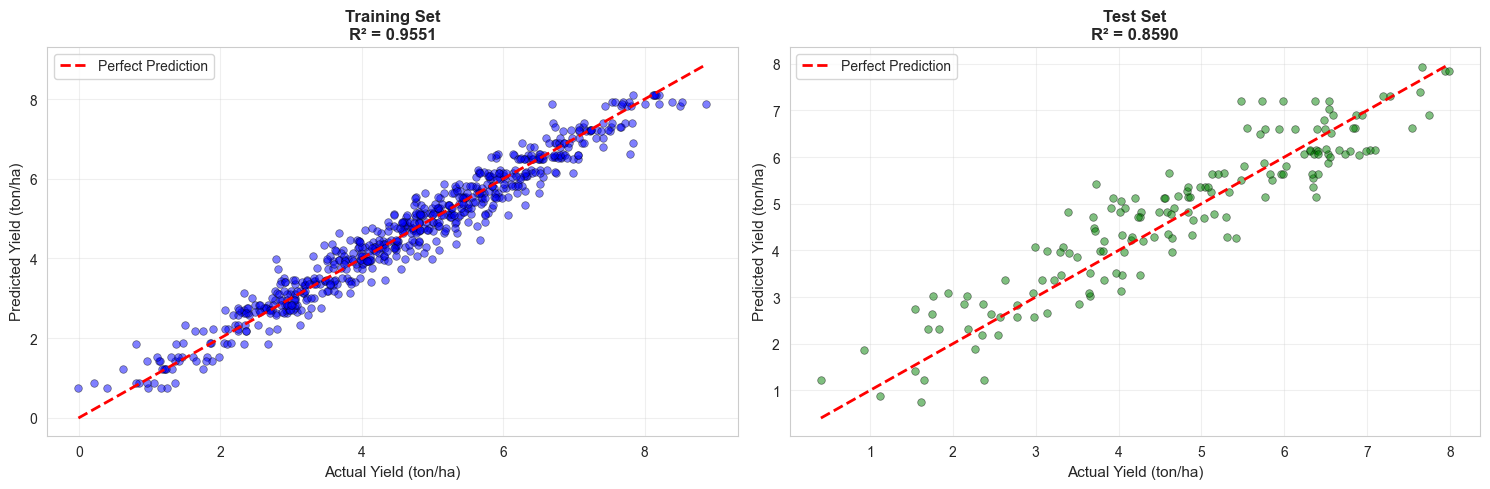

In [11]:
# Visualisasi 1: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training Set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue', edgecolor='black', linewidth=0.5, s=30)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Yield (ton/ha)', fontsize=11)
axes[0].set_ylabel('Predicted Yield (ton/ha)', fontsize=11)
axes[0].set_title(f'Training Set\nR² = {train_metrics["R2"]:.4f}', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Test Set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='green', edgecolor='black', linewidth=0.5, s=30)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Yield (ton/ha)', fontsize=11)
axes[1].set_ylabel('Predicted Yield (ton/ha)', fontsize=11)
axes[1].set_title(f'Test Set\nR² = {test_metrics["R2"]:.4f}', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

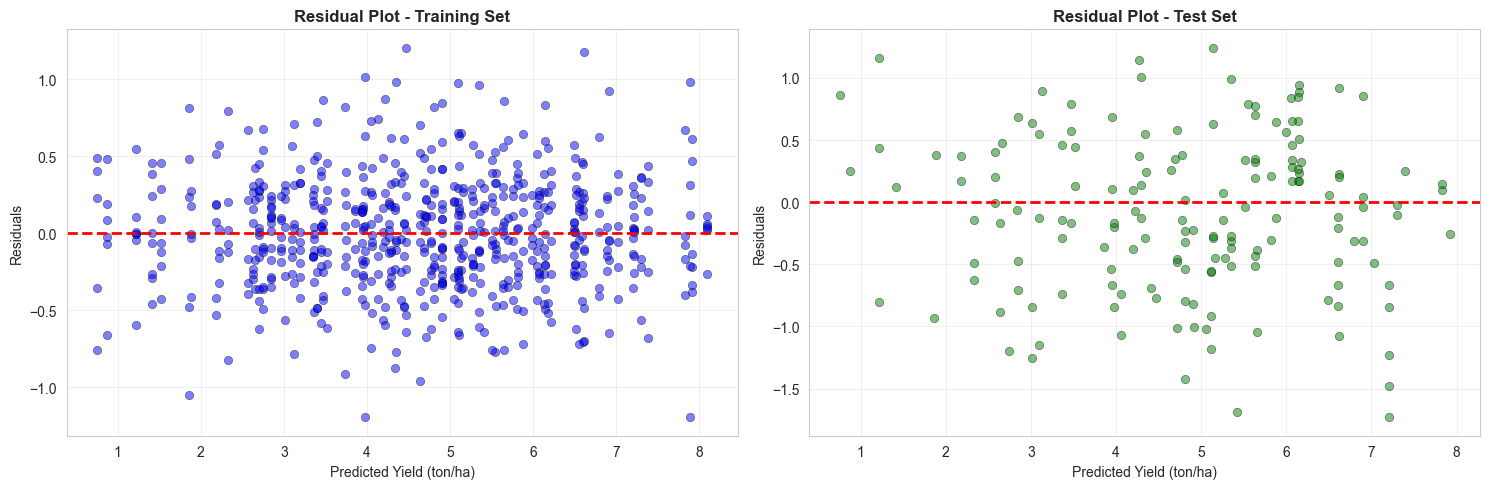

💡 Interpretasi: Titik tersebar acak di sekitar 0 = Model bagus


In [12]:
# Visualisasi 2: Residual Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training Residuals
train_residuals = y_train - y_train_pred
axes[0].scatter(y_train_pred, train_residuals, alpha=0.5, color='blue', edgecolor='black', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Yield (ton/ha)')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot - Training Set', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Test Residuals
test_residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, test_residuals, alpha=0.5, color='green', edgecolor='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Yield (ton/ha)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot - Test Set', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Interpretasi: Titik tersebar acak di sekitar 0 = Model bagus")

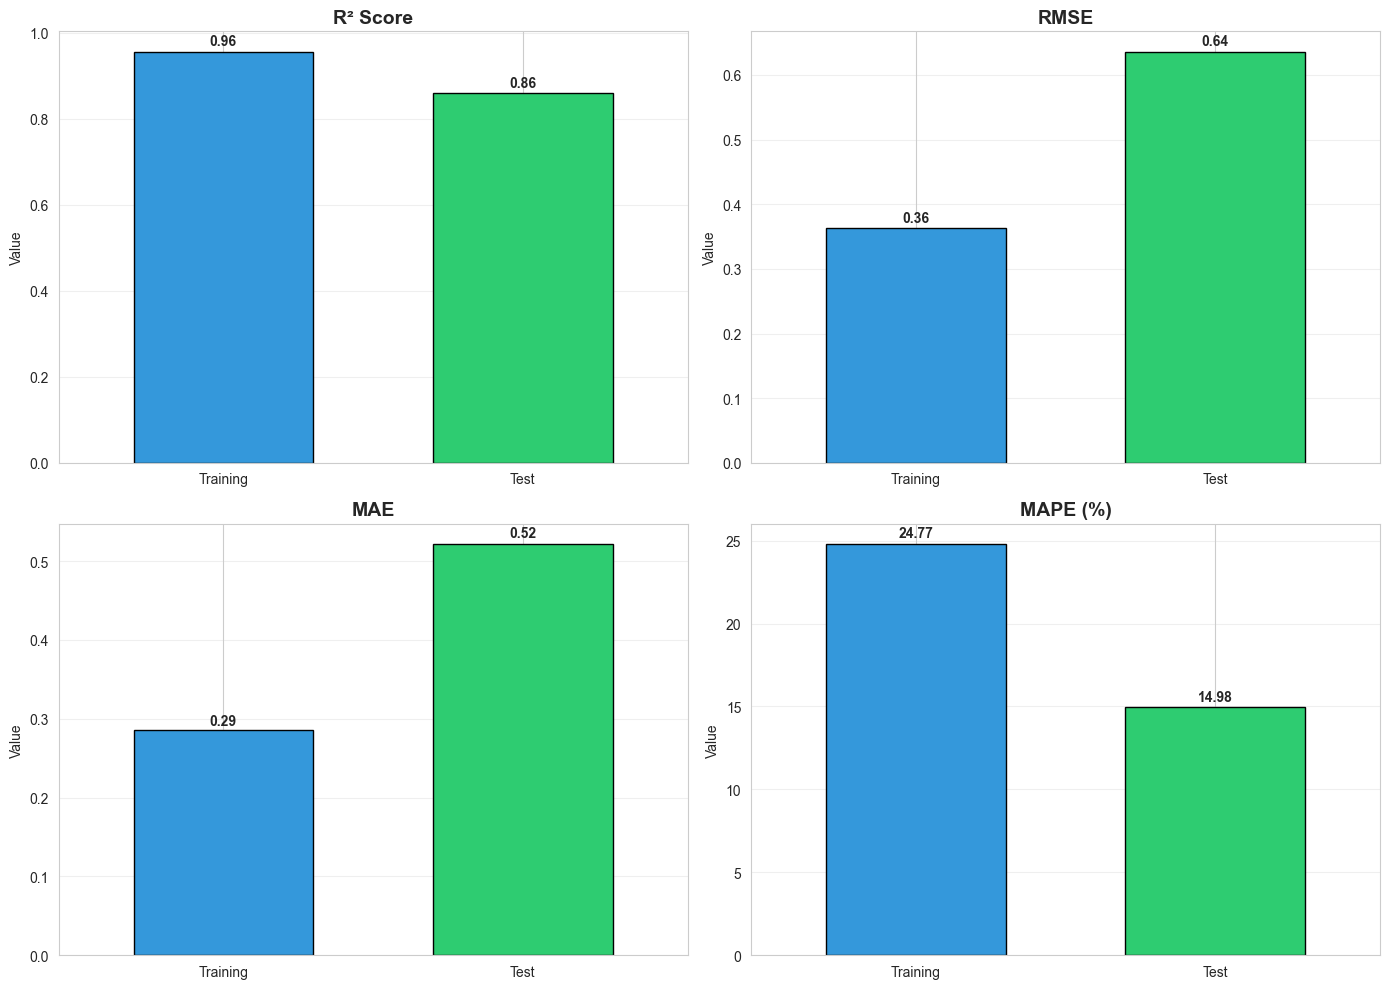

In [13]:
# Visualisasi 3: Comparison Bar Chart
metrics_df = pd.DataFrame({
    'Training': [train_metrics['R2'], train_metrics['RMSE'], train_metrics['MAE'], train_metrics['MAPE']],
    'Test': [test_metrics['R2'], test_metrics['RMSE'], test_metrics['MAE'], test_metrics['MAPE']]
}, index=['R² Score', 'RMSE', 'MAE', 'MAPE (%)'])

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
colors = ['#3498db', '#2ecc71']

for idx, metric in enumerate(metrics_df.index):
    ax = axes[idx]
    metrics_df.loc[metric].plot(kind='bar', ax=ax, color=colors, width=0.6, edgecolor='black')
    ax.set_title(f'{metric}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Value')
    ax.set_xticklabels(['Training', 'Test'], rotation=0)
    ax.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(metrics_df.loc[metric]):
        ax.text(i, v + 0.01*v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 9️⃣ Feature Importance

Fitur mana yang paling berpengaruh terhadap prediksi?

📊 Top 10 Fitur Paling Penting:

                Feature  Importance
            Rainfall_mm    0.655301
        Fertilizer_Used    0.174955
        Irrigation_Used    0.137655
    Temperature_Celsius    0.016155
        Days_to_Harvest    0.011096
Weather_Condition_Sunny    0.002143
         Soil_Type_Silt    0.001044
Weather_Condition_Rainy    0.000596
         Soil_Type_Loam    0.000479
              Crop_Rice    0.000401


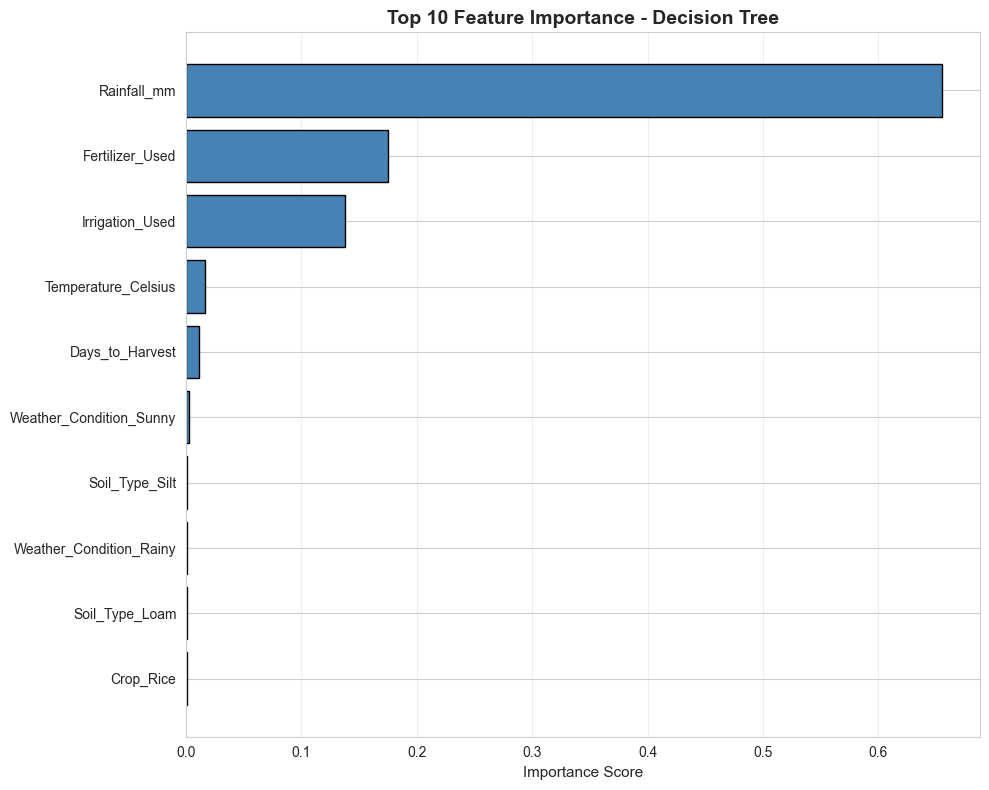

In [14]:
# Ambil feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("📊 Top 10 Fitur Paling Penting:\n")
print(feature_importance.head(10).to_string(index=False))

# Visualisasi
plt.figure(figsize=(10, 8))
top_10 = feature_importance.head(10)
plt.barh(range(len(top_10)), top_10['Importance'], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_10)), top_10['Feature'])
plt.xlabel('Importance Score', fontsize=11)
plt.title('Top 10 Feature Importance - Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 🔟 Visualisasi Decision Tree

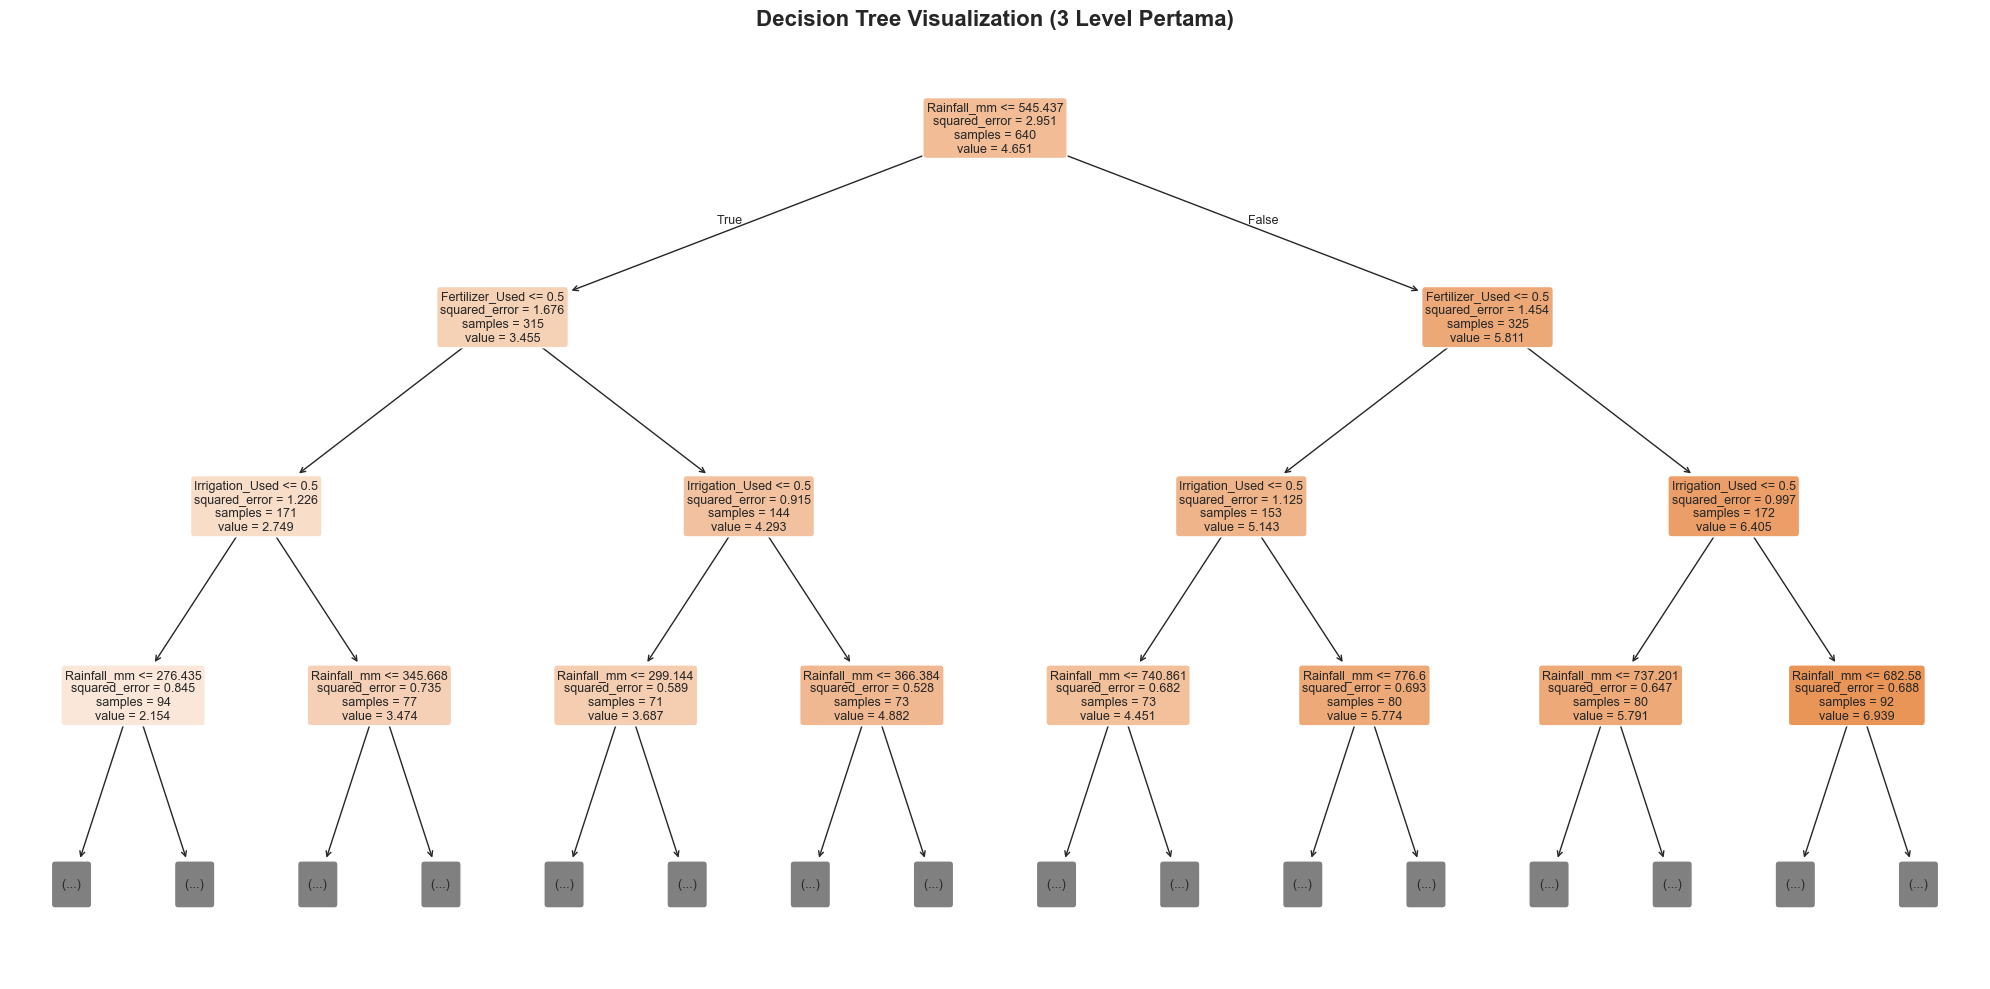

💡 Note: Ini hanya visualisasi 3 level pertama untuk kemudahan pembacaan.


In [15]:
# Visualisasi pohon (max_depth=3 untuk readability)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          max_depth=3,
          feature_names=X_train.columns,
          filled=True,
          fontsize=9,
          rounded=True)
plt.title('Decision Tree Visualization (3 Level Pertama)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("💡 Note: Ini hanya visualisasi 3 level pertama untuk kemudahan pembacaan.")

## 📋 Kesimpulan & Summary

In [16]:
# Summary tabel perbandingan
summary_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE (ton/ha)', 'MAE (ton/ha)', 'MAPE (%)'],
    'Training': [
        f"{train_metrics['R2']:.4f}",
        f"{train_metrics['RMSE']:.4f}",
        f"{train_metrics['MAE']:.4f}",
        f"{train_metrics['MAPE']:.2f}"
    ],
    'Test': [
        f"{test_metrics['R2']:.4f}",
        f"{test_metrics['RMSE']:.4f}",
        f"{test_metrics['MAE']:.4f}",
        f"{test_metrics['MAPE']:.2f}"
    ]
})

print("\n" + "="*60)
print("📊 SUMMARY PERFORMA BASELINE MODEL (DECISION TREE)")
print("="*60)
print(summary_df.to_string(index=False))
print("="*60)

# Interpretasi
print("\n💡 INTERPRETASI:")
if test_metrics['R2'] > 0.8:
    print("   ✅ Model SANGAT BAGUS (R² > 0.8)")
elif test_metrics['R2'] > 0.6:
    print("   ✅ Model BAGUS (R² > 0.6)")
elif test_metrics['R2'] > 0.4:
    print("   ⚠️  Model CUKUP (R² > 0.4)")
else:
    print("   ❌ Model PERLU IMPROVEMENT (R² < 0.4)")

# Cek overfitting
r2_diff = abs(train_metrics['R2'] - test_metrics['R2'])
if r2_diff < 0.1:
    print("   ✅ Tidak ada Overfitting (selisih R² < 0.1)")
elif r2_diff < 0.2:
    print("   ⚠️  Sedikit Overfitting (selisih R² < 0.2)")
else:
    print("   ❌ Overfitting Terdeteksi (selisih R² > 0.2)")

print(f"\n   📉 Average Error: ±{test_metrics['MAE']:.2f} ton/ha")


📊 SUMMARY PERFORMA BASELINE MODEL (DECISION TREE)
       Metric Training   Test
     R² Score   0.9551 0.8590
RMSE (ton/ha)   0.3640 0.6357
 MAE (ton/ha)   0.2852 0.5211
     MAPE (%)    24.77  14.98

💡 INTERPRETASI:
   ✅ Model SANGAT BAGUS (R² > 0.8)
   ✅ Tidak ada Overfitting (selisih R² < 0.1)

   📉 Average Error: ±0.52 ton/ha


## ✅ Yang Sudah Dilakukan

1. ✓ Load data preprocessing dari Minggu 2
2. ✓ Exploratory Data Analysis (EDA) lengkap
3. ✓ Implementasi Decision Tree Regressor
4. ✓ Training model dengan hyperparameter tuning
5. ✓ Evaluasi dengan metrik: R², RMSE, MAE, MAPE
6. ✓ Visualisasi hasil prediksi dan residual plot
7. ✓ Analisis Feature Importance
8. ✓ Visualisasi Decision Tree

---

## 🚀 Langkah Selanjutnya (Minggu 4-5)

### Model yang akan dicoba:
1. **Random Forest** - Ensemble dari banyak Decision Trees
2. **XGBoost** - Gradient Boosting yang powerful
3. **Hyperparameter Tuning** - Optimalkan parameter dengan Grid/Random Search
4. **Cross Validation** - Validasi lebih robust
5. **Model Comparison** - Bandingkan semua model

### 📝 Target:
- R² > 0.85
- MAPE < 10%
- Mengurangi overfitting
- Model yang lebih generalisasi

---

**🎉 Minggu 3 Selesai! Siap lanjut ke Advanced Models!**